<a href="https://colab.research.google.com/github/faisalmoinuddin99/OCR-Image-to-PDF-/blob/master/pdfToimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (317 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 57.2MB 75kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['en','hi'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
images = convert_from_path('test.pdf')

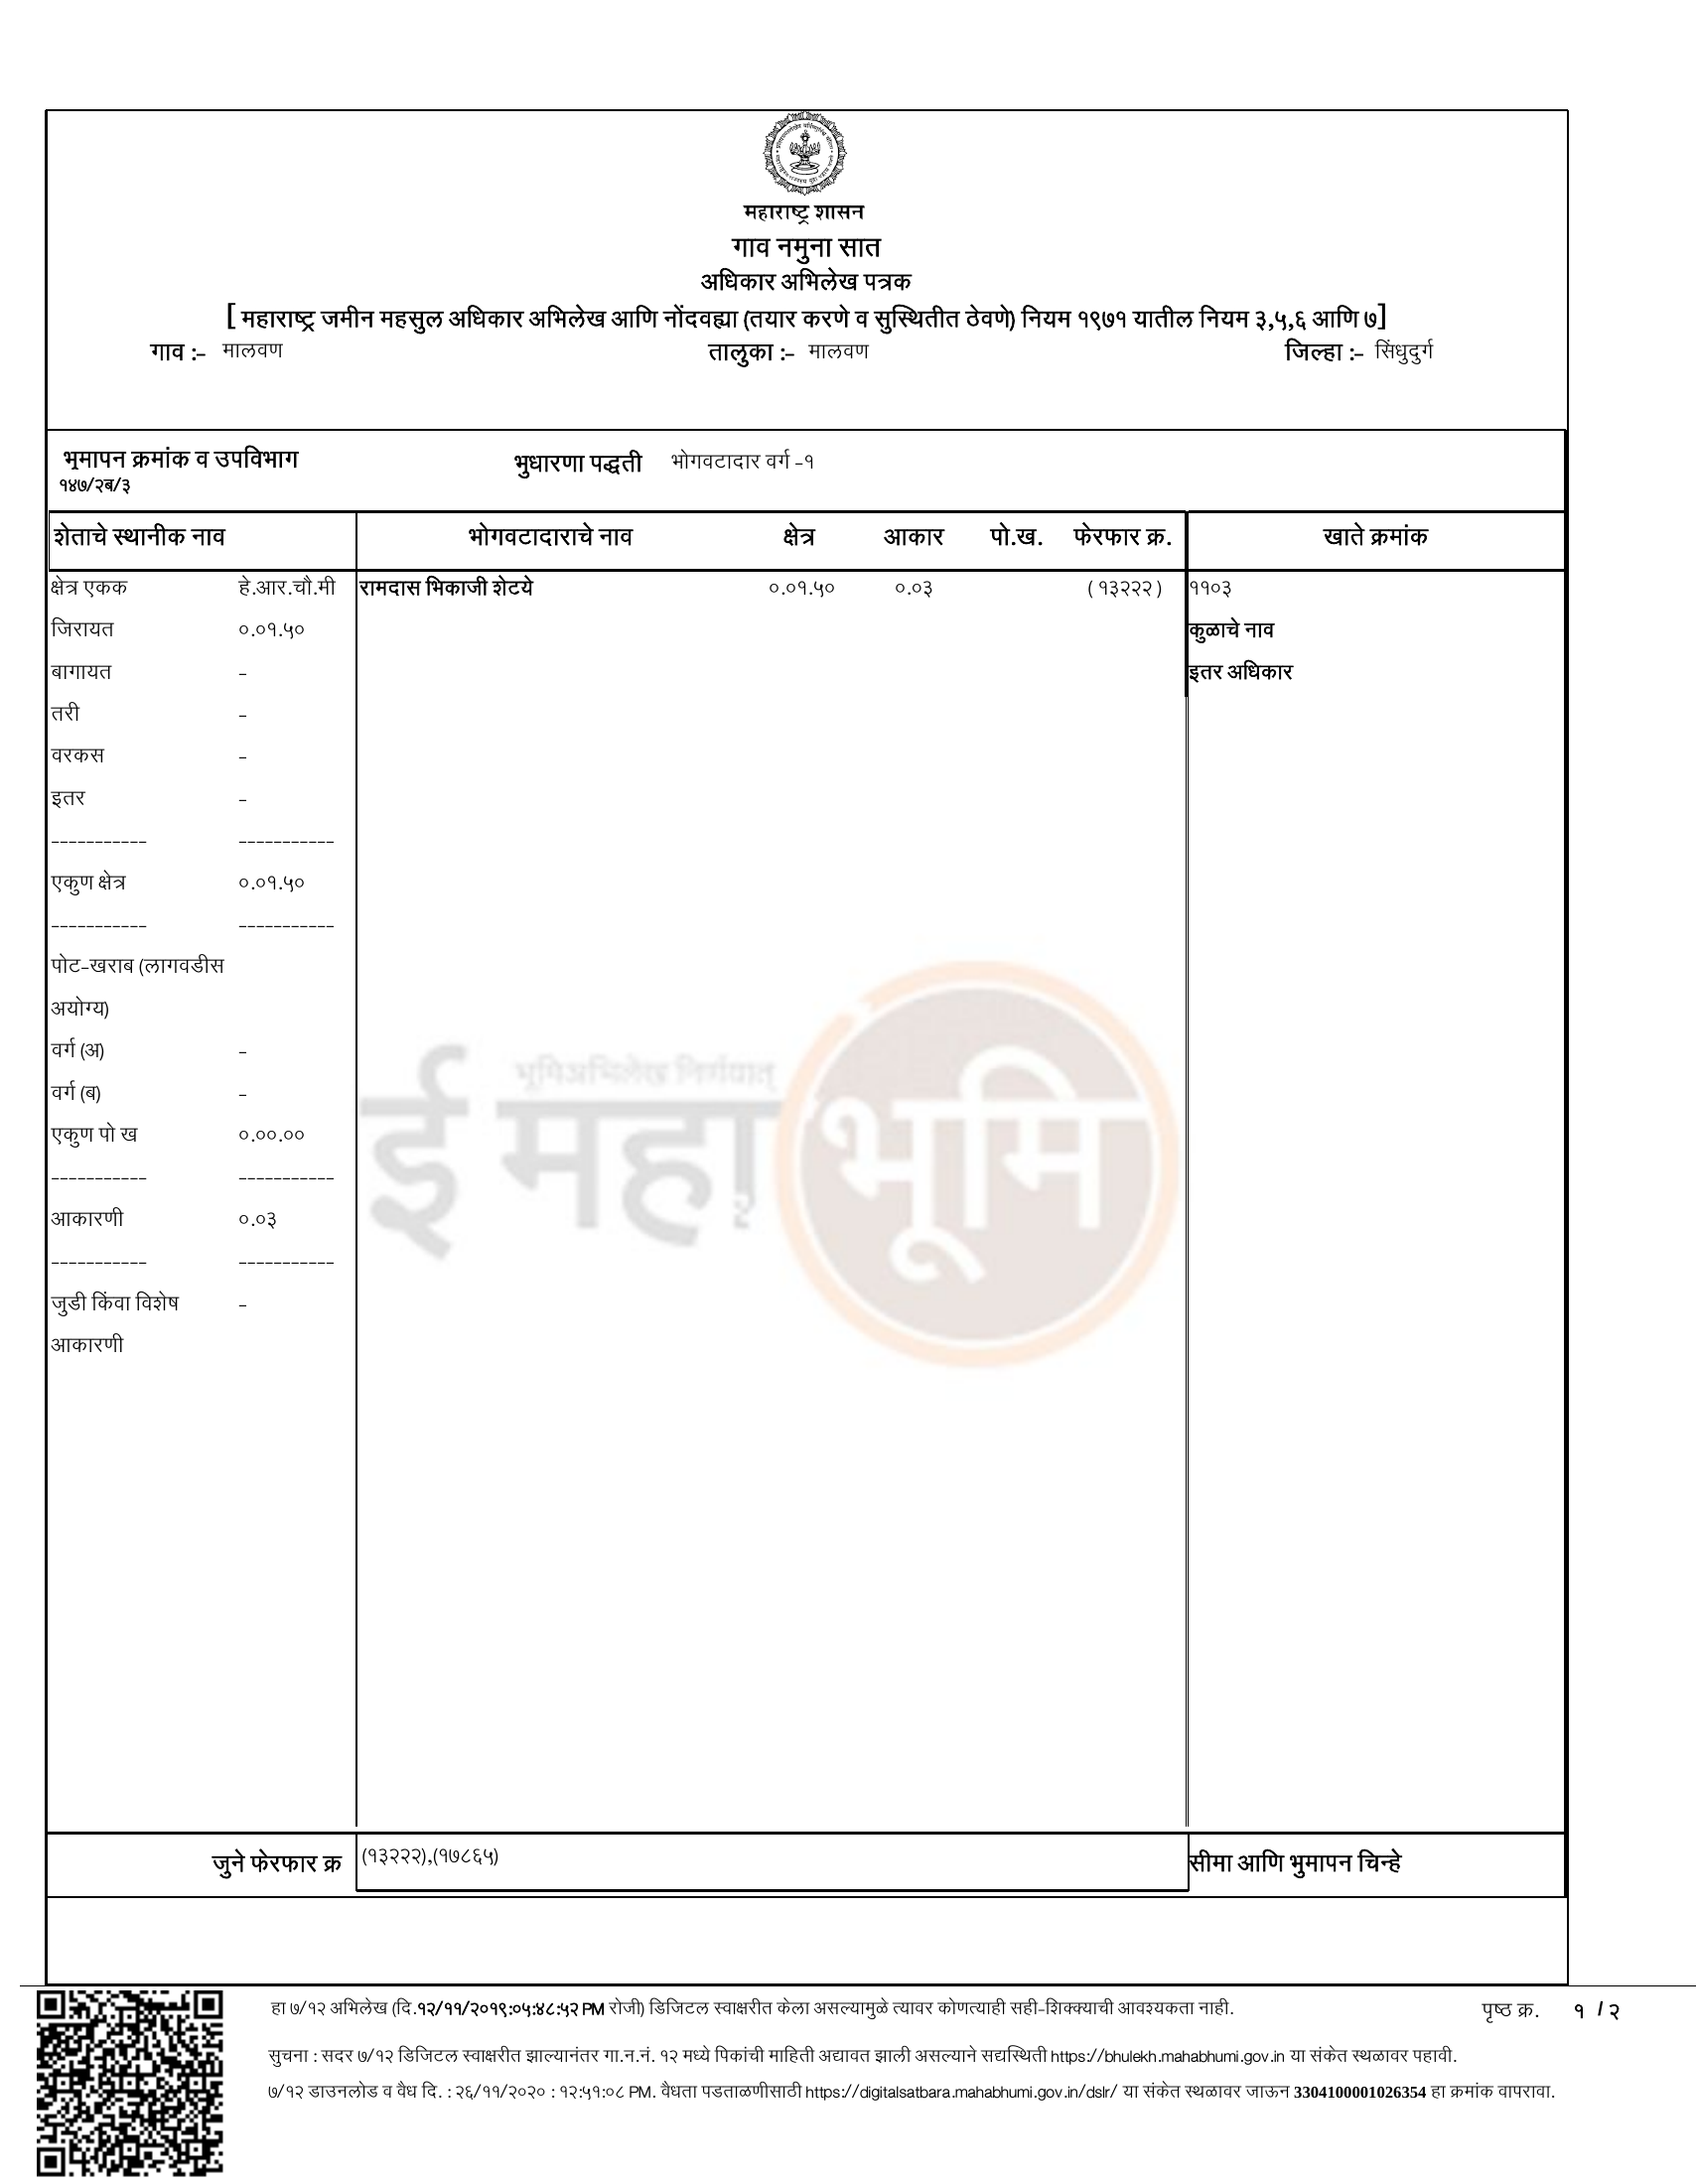

In [9]:
from IPython.display import display, Image
display(images[0])

In [10]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch',beamWidth=10)
bounds

[([[746, 204], [874, 204], [874, 228], [746, 228]],
  'महाराष्ट्र शासन',
  0.043407637625932693),
 ([[734, 238], [890, 238], [890, 270], [734, 270]],
  'गाव नमुना सात',
  0.09863805770874023),
 ([[702, 268], [922, 268], [922, 298], [702, 298]],
  'अधिकार अभिलख पत्रक',
  0.08344490826129913),
 ([[238, 299], [1401, 299], [1401, 344], [238, 344]],
  'महाराष्ट्र जमीन महसुल अधिकार अभिलेख आणि नोंदवह्या तयार करणे व सुस्थितीत ठेवणे नियम १९७१ यातील नियम ३,५६ आणि ७]',
  5.715631345992733e-07),
 ([[1287, 337], [1451, 337], [1451, 373], [1287, 373]],
  'जिल्हा :- सिंधुदुर्ग',
  0.16687557101249695),
 ([[221, 343], [287, 343], [287, 363], [221, 363]],
  'मालवण',
  0.11515123397111893),
 ([[710, 344], [878, 344], [878, 374], [710, 374]],
  'त्ालुका : मालवण',
  0.06394851952791214),
 ([[149, 345], [189, 345], [189, 365], [149, 365]], 'गाव', 0.5818390250205994),
 ([[62, 446], [306, 446], [306, 478], [62, 478]],
  'भमापन क्रमांक व उपविभाग',
  0.1618133932352066),
 ([[513, 447], [655, 447], [655, 489], 

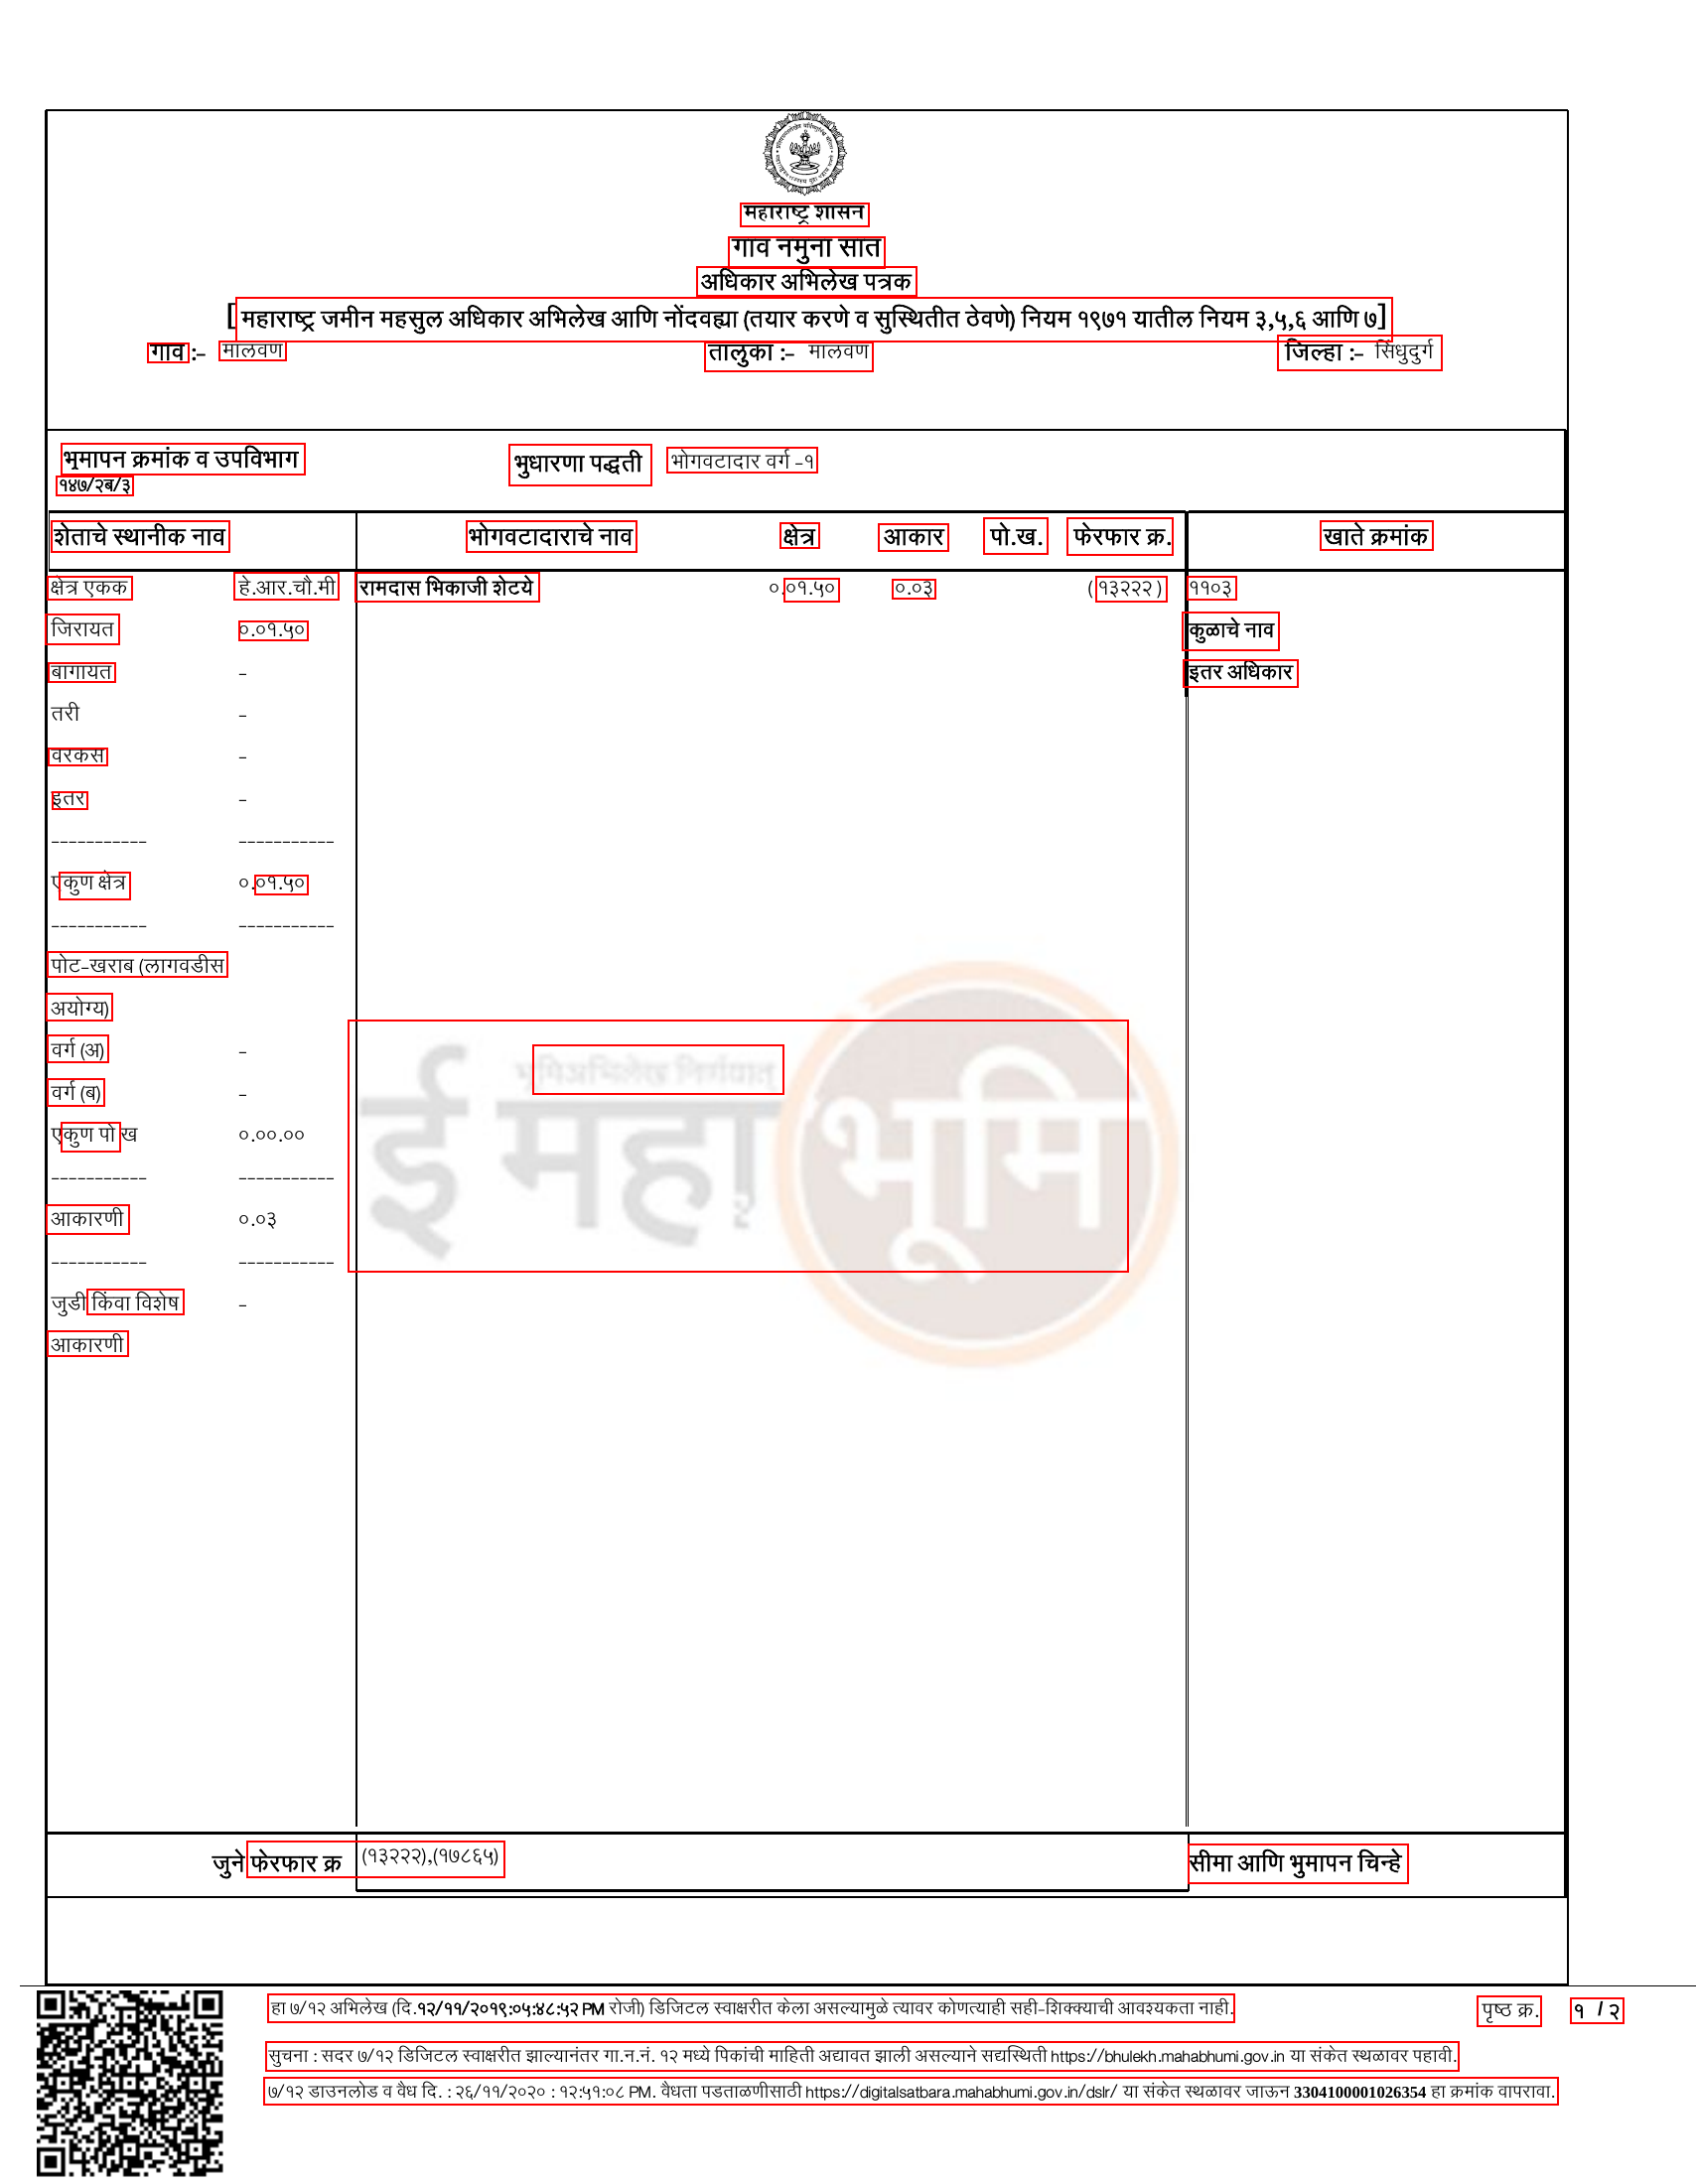

In [14]:
def draw_boxes(image, bounds, color='red', width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width= width)
  return image

draw_boxes(images[0], bounds)

In [16]:
bounds[0][1]

'महाराष्ट्र शासन'

In [17]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

महाराष्ट्र शासन
गाव नमुना सात
अधिकार अभिलख पत्रक
महाराष्ट्र जमीन महसुल अधिकार अभिलेख आणि नोंदवह्या तयार करणे व सुस्थितीत ठेवणे नियम १९७१ यातील नियम ३,५६ आणि ७]
जिल्हा :- सिंधुदुर्ग
मालवण
त्ालुका : मालवण
गाव
भमापन क्रमांक व उपविभाग
भुधारणा पद्घती
भोगवटादार वर्ग -९
१४७ २ब ३
पो.ख.
फरफार क्र॰
शेताचे स्थानीक नाव
भोगवटादाराचे नाव
खात्ते क्रमांक
क्षत्र
आकार
ह.आर.चौ॰मी
रामदास भिकाजी शेटये
क्षत्र एकक
१३२२२ |
११०३
०९.५०
0.03
कुळाचे नाव
जिरायत
0.0९.५0
इतर अधिकार
बागायत
वरकस
इतर
कुण क्षत्र
०९.५०
पोट खराब लागवडीस
अयोग्य
ई महाभूमि
वर्ग अ
a
वर्ग ब
कुण पो
आकारणी
किंवा विशेष
आकारणी
फरफार क्र   (१३२२२),(१७८६५)
सीमा आणि भुमापन चिन्हे
हा ७/१२ अभिलेख दि.१२/ ११ २०१९:०५:४८ :५२ PM रोजी) डिजिटल स्वाक्षरीत केला असल्यामुळे त्यावर कोणत्याही सही-शिक्क्याची आवश्यकता नाही
पृष्ठ क्र॰
१ !२
सुचना : सदर ७/१२ डिजिटल स्वाक्षरीत झाल्यानंतर गा.न.नं. १२ नध्ये पिकांची माहिती अद्यावत झाली असल्याने सद्यस्थिती htps  /bhulekh mahabhumi gov.in या संकेत स्थळावर पहावी.
७/१२ डाउनलोड व वैध दि. : २६/ ११ २०२० : १२:५१:०८ PM. वैधता पडताळण

In [23]:
with open('done.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
doc = nlp(text)

In [21]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter = True)